# Introduction to Scikit-learn (sk-learn)

This notebook demonstartes some of the most useful functions of the beautiful Scikit-Learn library

What we'll cover 

0. An end to end sklearn workflow
1. Getting the data ready 
2. Choose the right estimator/algo for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve a model 
6. Save and load a trained a model
7. Putting it all together!

## 0. An end to end Sklearn workflow

In [14]:
#1. Get the data ready

import pandas as pd 
import numpy as np
heart_disease = pd.read_csv("Heart disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
# create x (features matrix)

x = heart_disease.drop("target", axis = 1)

#create y (labels)

y = heart_disease["target"]



In [16]:
#2 . Choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We'll keep the default hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

In [18]:
clf.fit(X_train, y_train) #model fit to data

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2


In [19]:
y_train

88     1
203    0
63     1
196    0
197    0
      ..
205    0
143    1
287    0
51     1
49     1
Name: target, Length: 242, dtype: int64

In [20]:
# make a prediction

y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [21]:
y_test

166    0
187    0
293    0
210    0
132    1
      ..
168    0
234    0
39     1
231    0
177    0
Name: target, Length: 61, dtype: int64

In [22]:
# 4. Evaluate the model on training data and test data

clf.score(X_train, y_train)

1.0

In [23]:
clf.score(X_test, y_test)

0.8032786885245902

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [25]:
confusion_matrix(y_test, y_preds)

array([[19,  8],
       [ 4, 30]], dtype=int64)

In [27]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [32]:
#5 . Improve the model 
#Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set : {clf.score(X_test, y_test) * 100}")
    print("")

Trying model with 10 estimators...
Model accuracy on test set : 77.04918032786885

Trying model with 20 estimators...
Model accuracy on test set : 77.04918032786885

Trying model with 30 estimators...
Model accuracy on test set : 81.9672131147541

Trying model with 40 estimators...
Model accuracy on test set : 81.9672131147541

Trying model with 50 estimators...
Model accuracy on test set : 86.88524590163934

Trying model with 60 estimators...
Model accuracy on test set : 85.24590163934425

Trying model with 70 estimators...
Model accuracy on test set : 83.60655737704919

Trying model with 80 estimators...
Model accuracy on test set : 83.60655737704919

Trying model with 90 estimators...
Model accuracy on test set : 81.9672131147541



In [33]:
#6. Save the model and load it 

import pickle

pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [35]:
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

In [36]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.2 (default, Apr 14 2020, 19:01:40) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Ankur\sample_project\env\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 46.1.3.post20200330
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting the data ready to be used with machine learning 

Three main things we have to do 

1. Split the data into features and labels - X and y respectively 
2. Filling (also called imputing) or disregarding missing values
3. converting non numerical values to numerical values (also called feature encoding)


In [38]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [39]:
X = heart_disease.drop("target", axis = 1)
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [40]:
y = heart_disease["target"]
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [43]:
#split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [47]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [49]:
car_sales.dtypes


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [57]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [101]:
#Split the data into x and y 

X = car_sales.drop("Price", axis = 1)
y= car_sales["Price"]

In [102]:
#Split into training and test data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [104]:
#Build ML model 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [110]:
#Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [111]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [112]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [100]:
# let's refit the model 

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                   y, 
                                                   test_size = 0.2)
model.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 950]

In [108]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [109]:
model.score(X_test, y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 1.2 What if there were miising values ? 

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether 


In [70]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [74]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [75]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [96]:
#Create X and y 

X= car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]



In [97]:
# Let's try and convert out data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

# Option 1 : Fill missing data with Pandas

In [138]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column 
car_sales_missing["Colour"].fillna("missing", inplace = True)

# fILL THE "oDOMETER (km)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# fill the "doors" column with max doors value
car_sales_missing["Doors"].fillna(4, inplace = True)


In [99]:
#Check our dataframe again 
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [90]:
# we cannot replace price column as it's the one we;re predicting. So we remove the price missing rows altogether

# remove rows with missing Price 
car_sales_missing.dropna(inplace=True)

In [91]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [92]:
len(car_sales_missing)

950

In [93]:
X= car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [94]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4.0
1,BMW,Blue,192714,5.0
2,Honda,White,84714,4.0
3,Toyota,White,154365,4.0
4,Nissan,Blue,181577,3.0
...,...,...,...,...
995,Toyota,Black,35820,4.0
996,missing,White,155144,3.0
997,Nissan,Blue,66604,4.0
998,Honda,White,215883,4.0


In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### option 2 : Fill missing values with Scikit learn

In [115]:
#In a nutshell, the video shows filling and transforming the entire dataset (X) and although the code works and runs, it's best to fill and transform training and test sets separately.

#I've fixed the code on GitHub for both notebooks (all previous links to these notebooks will work) to reflect this as well as created an end-to-end Colab notebook to reflect the change:

#The main takeaways:

#Split your data first (into train/test), always keep your training & test data separate

#Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

#Don't use data from the future (test set) to fill data from the past (training set)

#Keep these in mind when you watch the upcoming video,

## Option 2 : Fill missing values using Scikitlearn 

In [118]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [119]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [122]:
car_sales_missing.dropna(subset = ["Price"], inplace = True )
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [123]:
# sSplit into X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]
pd.DataFrame(X)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [124]:
pd.DataFrame(y)

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


In [125]:
# Split into Training and Test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [126]:
#Check missing values 

X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [132]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train


array([['BMW', 'Blue', 3.0, 142189.0],
       ['Toyota', 'White', 4.0, 201039.0],
       ['Honda', 'White', 4.0, 131685.74931129476],
       ...,
       ['Nissan', 'White', 4.0, 102303.0],
       ['Toyota', 'Blue', 4.0, 221076.0],
       ['Toyota', 'White', 4.0, 188755.0]], dtype=object)

In [130]:
#Get our transformed data in data frame 

car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                     columns = ["Make", "Colour", "Doors",
                                               "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                                    columns = ["Make", "Colour", "Doors"
                                              , "Odometer (KM)"])

# cHECK MISSING DATA IN TRAINING SET
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [136]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.42189000e+05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.01039000e+05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.31685749e+05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.02303000e+05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.21076000e+05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.88755000e+05]])

In [137]:
# Now that we've transformed X, let's see if we can fit a model 
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.29582764419994145

In [141]:
len(car_sales_missing) , len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algo for our problem

Sci-kit learn uses estimator or another term for machine learning model or algorithm 

*Classification - predicting whether a sample is one thing or another

*Regression - predicting a number 

1. Check the scikit learn learning map 

## 2.1 Picking a machine learning model for a regression problem 

In [144]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [152]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [155]:
# How many samples ?
len(boston_df), boston_df.shape

(506, (506, 14))

In [159]:
# Let's try the ridge regression model 

from sklearn.linear_model import Ridge

#setup a random seed
np.random.seed(42)

# Create the data

X =  boston_df.drop("target", axis = 1)
y = boston_df["target"]

#Split into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate ridge model 

model = Ridge()
model.fit(X_train, y_train)

#Check the score on Ridge model on test data 

model.score(X_test, y_test)

0.6662221670168522

In [160]:
model.score(X_train, y_train)

0.7487825119234439

# How do we improve this score?

# What if ridge wasn't working ?



In [163]:
# Let's try the Random Forest
from sklearn.ensemble import RandomForestRegressor 

# Setup the random seed
np.random.seed(42)

#Create the data 

X= boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Create test and train split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate random forest regressor 
rf = RandomForestRegressor()

#Evaluate the RRR
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.873969014117403

In [164]:
# Check the Ridge model again
model.score(X_test, y_test)

0.6662221670168522

## 2.2 Choosing an estimtor for classification problem 

### let's go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [166]:
heart_disease = pd.read_csv("Heart disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [167]:
len(heart_disease)

303

### We're trying a Linear SVC - after consulting the map

In [175]:
from sklearn.svm import LinearSVC

#Setup Random seed

np.random.seed(42)

# Make X and y

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4918032786885246

In [170]:
### C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ### warnings.warn("Liblinear failed to converge, increase "

In [171]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [172]:
#without fixing out model out model was not working that good(47%) accuracy. So we need to test another model. 


In [177]:
from sklearn.ensemble import RandomForestClassifier

#Setup Random seed

np.random.seed(42)

# Make X and y

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Instantiate RRR
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

### Tidbit: 

#### If you have structured data - labels and targets - Use Ensemble data

#### If you have unstructured data (images, audio) , use Deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

In [182]:
from sklearn.ensemble import RandomForestClassifier

#Setup Random seed

np.random.seed(42)

# Make X and y

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Instantiate RRR
clf = RandomForestClassifier(n_estimators = 100)

#Fit the model to the data (training ML model)
clf.fit(X_train, y_train)

# Evaluate the RRR (use the patterns the model has predicted in production)
clf.score(X_test, y_test)

0.8524590163934426

In [180]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [181]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.3 Make predictions using a machine learning model 

### 2 ways to make predictions:
1. 'predict()'
2. 'predict_proba()'

In [185]:
# Use a trained model to make predictions 
clf.predict(np.array([1,7,8,3,4])) #that doesn't work


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [186]:
X_test.shape

(61, 13)

In [187]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [188]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [189]:
# Compare predictions to truth labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [190]:
clf.score(X_test, y_test)

0.8524590163934426

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### Make prdictions with predict_proba()

In [194]:
# Make predictions with predict_proba()

# the returned estimates for all classes are ordered by the label of classes
# probability estimates , return probs of classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [199]:
# the probability of predicting is 0.89 for 0 
# 0.51 probability of label 1 
# 0.57 probability for 1
# 0.84 probability for 0

### where would you use this ? we don't want when our probability is 0.51 for the label
### we can see hey why is the probability for this sample only 51%

In [195]:
#Let's predict () on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [196]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [197]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


### predict() can also be used for Regression models

In [200]:
# Let's try the Random Forest
from sklearn.ensemble import RandomForestRegressor 

# Setup the random seed
np.random.seed(42)

#Create the data 

X= boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Create test and train split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate random forest regressor 
rf = RandomForestRegressor()

#Evaluate the RRR
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [207]:
y_preds = rf.predict(X_test)
y_preds

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738, 19.516, 19.83 ,  8.885, 21.918, 19.477, 26.465,
       19.347,  8.039, 45.414, 14.542, 24.564, 23.941, 14.481, 23.077,
       15.031, 14.625, 21.171, 14.164, 19.251, 20.717, 19.433, 23.242,
       31.091, 20.39 , 14.294, 15.796, 34.3  , 19.155, 20.639, 24.464,
       18.779, 29.688, 45.257, 19.449, 22.334, 13.727, 15.408, 24.621,
       18.783, 28.247, 21.411, 33.961, 17.011, 26.312, 44.904, 21.988,
       15.65 , 32.316, 22.281, 20.394, 25.405, 34.266, 28.938, 18.857,
       26.909, 17.154, 13.731, 23.079, 28.508, 15.818, 20.41 , 28.38 ,
       10.153, 21.336, 22.393,  7.093, 20.059, 45.424, 10.964, 12.914,
       21.387, 12.29 , 20.234,  9.065, 20.218, 26.736, 15.531, 23.228,
       23.568, 17.719, 21.64 ,  7.991, 19.6  , 18.7  , 22.292, 19.665,
       38.756, 13.03 , 12.49 , 13.406, 20.219, 23.898])

In [203]:
np.array(y_test)

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [208]:
### we can check how far is predicted from actual ?

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluating a Machine Learning model 

1. Estimator 'score' method 
2. The scoring parameter
3. Problem -specific metric functions

### 4.1 Evaluating the score method

In [210]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X= heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
clf.score(X_train, y_train)

1.0

In [212]:
clf.score(X_test, y_test)

# returns the mean accuracy on predicted and actual 

0.8524590163934426

In [213]:
### let's do the same but for regression

In [216]:
# Let's try the Random Forest
from sklearn.ensemble import RandomForestRegressor 

# Setup the random seed
np.random.seed(42)

#Create the data 

X= boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Create test and train split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate random forest regressor 
model = RandomForestRegressor()

#Evaluate the RRR
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [218]:
model.score(X_test, y_test)

#Return the coefficient of determination R^2 of the prediction.

0.873969014117403

### 4.2 Evaluate the model using the scoring parameter

In [221]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

#Setup Random seed

np.random.seed(42)

# Make X and y

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Instantiate RRR
clf = RandomForestClassifier(n_estimators = 100)

#Fit the model to the data (training ML model)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [222]:
clf.score(X_test, y_test)

0.8524590163934426

In [224]:
cross_val_score(clf,X,y, cv = 5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [225]:
## Cross validation 

#if we are training only one model (one split), it could be a lucky split.  
#but if we create 5 different models - splitting 
#it 80/20 in different combinations we might get the best combination

In [226]:
cross_val_score(clf,X,y, cv = 10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [228]:
np.random.seed(42)

# Single training and test split score 
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5 fold cross validation score 

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

# Compute the two
clf_single_score , clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

In [230]:
# Scoring parameter set to None by default 
cross_val_score(clf, X,y , cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics 

1. Accuracy
2. Area under ROC curve
3. Confusion matrix 
4. Classification report

### 1. Accuracy

In [359]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [360]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv = 5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [361]:
np.mean(cross_val_score)

0.8248087431693989

In [362]:
print("heart disease Classifier accuracy :" ,np.mean(cross_val_score) *100 ) 

heart disease Classifier accuracy : 82.48087431693989


**Area under the receiver operating characteristic curve (AUC/ROC)

*Area under curve (AUC)
*ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1 
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [363]:
# Cre
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [364]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probs
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [365]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [366]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates 
fpr[:10]

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552])

In [367]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [368]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

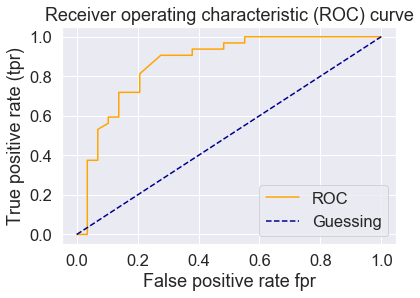

In [369]:
# Create a  function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model
    """
    #Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    #Customise the plot
    plt.xlabel("False positive rate fpr")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)  
    
    
    

In [370]:
from sklearn import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

ImportError: cannot import name 'roc_auc_score' from 'sklearn' (C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\__init__.py)

In [345]:
# Plot perfect ROC curve and AUC score 
fpr, tpr , thresholds = roc_curve(y_test, y_test)
plt.plot(fpr, tpr)

ValueError: multiclass format is not supported

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence , giving you an idea where the model is getting confused

In [371]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [372]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Labels"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [373]:
22+7+8+24

61

In [374]:
len(y_preds)

61

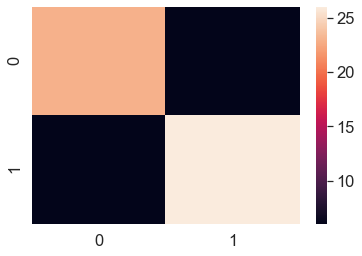

In [375]:
# Make our confusion matrox more visual with Seaborn's heatmap()

import seaborn as sns

#Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn 
sns.heatmap(conf_mat) ;

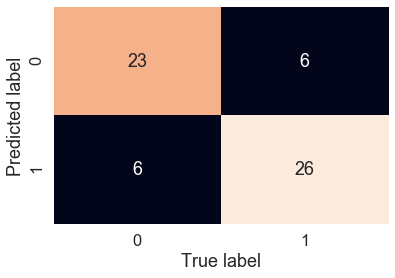

In [376]:
def plot_conf_mat(conf_mat):
    
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    
    fix, ax = plt.subplots()
    ax = sns.heatmap(conf_mat,
                    annot = True, 
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");
    
plot_conf_mat(conf_mat)

** Classification Report 

In [382]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [386]:
# Where precision and recall become valuable 

# Class imbalance is very large 

disease_true = np.zeros(10000)
disease_true[0] = 1 # only 1 positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [ ]:
# even though the model reaches accuracy of 99%, it's not balanced

## Practice on IRIS data set example - Classification problem

In [285]:
from sklearn.datasets import load_iris

In [294]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [303]:
iris_data_data = iris_data["data"]
iris_data_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [300]:
target_data = iris_data["target"]
target_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [304]:
iris_df = pd.DataFrame(iris_data_data, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
iris_df["target"] = target_data
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [305]:
len(iris_df), iris_df.shape, iris_df.size, iris_df.dtypes

(150,
 (150, 5),
 750,
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 target            int32
 dtype: object)

In [306]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [346]:
# Create X and y

X1 = iris_df.drop("target", axis = 1)
y1 = iris_df["target"]

# Create train and test split 

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1 , test_size = 0.2)

### I'm going to first work with RandomForestClassifier

In [347]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier()

# Fit the model on training data
clf.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [348]:
# Prediction 
y1_preds = clf.predict(X1_test)
y1_preds

array([1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2,
       1, 0, 1, 2, 2, 0, 0, 1])

In [349]:
np.array(y1_test)

array([1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2,
       1, 0, 1, 2, 2, 0, 0, 1])

In [327]:
# Predict the probability 
clf.predict_proba(X1_test)

array([[0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 0.  , 1.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.07, 0.93],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.01, 0.8 , 0.19],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.16, 0.84]])

In [350]:
# Check the score 
clf.score(X1_test, y1_test)

0.9666666666666667

In [351]:
# Check the mean absolute error
from sklearn.model_selection import mean_absolute_error
clf.mean_absolute_error(y1_test, y1_preds)

ImportError: cannot import name 'mean_absolute_error' from 'sklearn.model_selection' (C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\__init__.py)

In [352]:
# Check the cross_val_score 
from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(clf, X1, y1, cv = 5)
cross_val_score

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

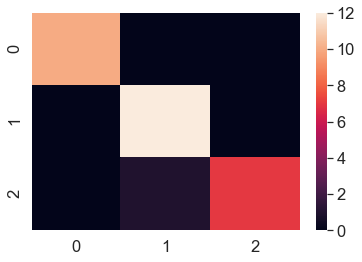

In [379]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y1_test, y1_preds)

sns.heatmap(conf_matrix)

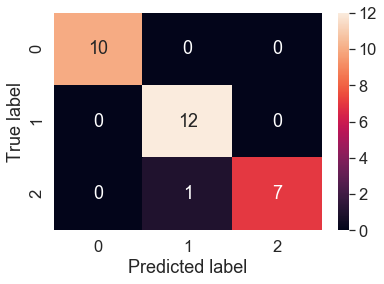

In [380]:
def plot_conf_mat(conf_matrix):
    
    fig, ax = plt.subplots()
    ax = sns.heatmap(conf_matrix,
                annot = True,
                    cbar = True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");
    
plot_conf_mat(conf_matrix)

In [385]:
from sklearn.metrics import classification_report

class_report = classification_report(y1_test, y1_preds)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### 4.2.2 Regression model evaluation metrics

1. R^2  OR Coefficient of detrmination 
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

R2 = compares your model's predictions to the mean of the targets. Values can range from negative infinity to 1. If all your model does in predict the mean of the targets, It's R2 value will be zero. And if your model perfectly predicts a range of numbers it's R2 value would be 1. 

R2 tells us how cloe the values are to the fitted regression line. It's also 1 - relative squared error. so 1 - RSE will tell us the accuracy. 

In [388]:
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train);

In [393]:
from sklearn.metrics import r2_score

#Fill array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [394]:
y_test.mean()

21.488235294117644

In [395]:
r2_score(y_test, y_test_mean)

0.0

In [397]:
y_pred = model.predict(X_test)
y_pred

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738, 19.516, 19.83 ,  8.885, 21.918, 19.477, 26.465,
       19.347,  8.039, 45.414, 14.542, 24.564, 23.941, 14.481, 23.077,
       15.031, 14.625, 21.171, 14.164, 19.251, 20.717, 19.433, 23.242,
       31.091, 20.39 , 14.294, 15.796, 34.3  , 19.155, 20.639, 24.464,
       18.779, 29.688, 45.257, 19.449, 22.334, 13.727, 15.408, 24.621,
       18.783, 28.247, 21.411, 33.961, 17.011, 26.312, 44.904, 21.988,
       15.65 , 32.316, 22.281, 20.394, 25.405, 34.266, 28.938, 18.857,
       26.909, 17.154, 13.731, 23.079, 28.508, 15.818, 20.41 , 28.38 ,
       10.153, 21.336, 22.393,  7.093, 20.059, 45.424, 10.964, 12.914,
       21.387, 12.29 , 20.234,  9.065, 20.218, 26.736, 15.531, 23.228,
       23.568, 17.719, 21.64 ,  7.991, 19.6  , 18.7  , 22.292, 19.665,
       38.756, 13.03 , 12.49 , 13.406, 20.219, 23.898])

In [398]:
r2_score(y_test, y_pred)

0.8739690141174031

In [401]:
model.score(X_test, y_test)

0.873969014117403

### Mean Absolute Error

In [404]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [413]:
df = pd.DataFrame(data = {"Actual labels" : y_test, "Predicted labels" : y_preds })
df

df["differences"] = df["Predicted labels"] - df["Actual labels"] 
df

,Actual labels,Predicted labels,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


### Mean Squared Error

### MSE amplifies larger differences. Like we're predicting values of houses (too high in general) 

Pay more attention to MAE : When being 10k off is twice as bad as being 5k off

Pay more attention to MSE : When being 10k off is more than twice as bad as being 5k off

In [416]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

### 4.23 Finally using the 'scoring' parameter

In [421]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)


In [422]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y , cv= 5)
cv_acc
# We have set 'scoring' = None which is default. And this picks the 
# value from clf.score() which uses mean accuracy by default. 
# Hence the o/p will be mean accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [424]:
# Cross-validated accuracy 
print(f'The cross validated accuracy is : {np.mean(cv_acc)*100}')

The cross validated accuracy is : 82.48087431693989


In [427]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y , cv= 5, scoring = "accuracy")
cv_acc
print(f'The cross validated accuracy is : {np.mean(cv_acc)*100}')
# Unlike above, we have specified the accuracy as 'scoring'

The cross validated accuracy is : 82.48087431693989


In [429]:
# Precision

cv_precision = cross_val_score(clf, X, y , cv= 5, scoring = 'precision')
cv_precision

array([0.80555556, 0.90322581, 0.83870968, 0.78787879, 0.76923077])

In [430]:
print(f'The cross validated precision : {np.mean(cv_precision)*100}')

The cross validated precision : 82.09201193072161


In [432]:
# Recall 

cv_recall = cross_val_score(clf, X, y , cv= 5, scoring = 'recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.84848485])

In [433]:
print(f'The cross validated recall : {np.mean(cv_recall)*100}')

The cross validated recall : 84.84848484848484


### How about Regression model?

In [436]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators= 100)

In [439]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y , cv= 5, scoring = None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [440]:
# R2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv= 5, scoring = "r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [441]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y , cv = 5, scoring = "neg_mean_absolute_error")
cv_mae

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [442]:
#Mean squared error

np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv= 5, scoring = "neg_mean_squared_error")
cv_mse

array([ -7.99104182, -12.88009356, -20.06894699, -45.70549288,
       -19.77049657])

In [443]:
cv_mse.mean()

-21.283214366686064

In [444]:
np.mean(cv_mse)

-21.283214366686064

### 4.3 Using different evaluation metrics as Scikit learn functions

In [458]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators= 100)
clf.fit(X_train, y_train)

#Make some predictions 
y_preds = clf.predict(X_test)

#Evaluate the classifier 
print("Classifier metrics on the test set")
print("Accuracy: ",accuracy_score(y_test, y_preds)*100)
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall:{recall_score(y_test, y_preds)}")
print(f"f1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy:  85.24590163934425
Precision: 0.8484848484848485
Recall:0.875
f1: 0.8615384615384615


In [459]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# Repeat steps like above

## 5. Improving a model

First prediction = baseline predictions
First model = baseline model

From a data perspective 
* Could we collect more data? (generally , the more data the better)
* Could we improve our data? 

From a model perspective :
* Is there a better model we could use 
* Could we improve the current model?

Hyperparams Vs Params

Parameters = model fins these patterns in the data
Hyperparameters = settings on a model you can adjust to potentially adjust to improve its ability to find patterns 

In [461]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 100)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

Let's make three sets - Training, validation and test

In [462]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# We're going to try and adjust the following 

* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* 'n_estimators'

In [479]:
def evaluate_preds(y_true, y_preds) :
    """
    Performs evaluation comparison on y_true labels vs
    y_pred labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy ": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall" : round(recall,2),
                  "f1" : round(f1,2)}
    print("Accuracy:", accuracy*100)
    print("Precision:", precision)
    print("Recall:" , recall)
    print("f1 score:", f1)
    
    return metric_dict

In [481]:
heart_disease

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data into X and y

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and split
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 *len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [482]:
len(y_train), len(y_valid), len(y_test)


(212, 45, 46)

In [485]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on validation split 
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 84.44444444444444
Precision: 0.8461538461538461
Recall: 0.88
f1 score: 0.8627450980392156


In [477]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [491]:
np.random.seed(42)

# Create a second classifier with different hyperparameters 
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters 
y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22222222222221
Precision: 0.8148148148148148
Recall: 0.88
f1 score: 0.8461538461538461


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [498]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10,100, 200, 500, 1000,1200],
        "max_depth" :[None, 5, 10, 20, 30],
        "max_features" : ["auto", "sqrt"], 
        "min_samples_split" : [2,4,6],
        "min_samples_leaf" : [1,2,4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test tests
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1) # how much of your compiter processor will you dedicate to this ML model, -1 means all

# Setup randomized searchcv
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 50, # no of models to try
                           cv = 5,
                           verbose = 2)

# Fit the randomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=1000, min_samples_split=4, min_s

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, m

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_lea

[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.4s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished


In [499]:
rs_clf.best_params_
#finds the best parameters for us

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [500]:
# Make prediction with the best hyperparams 
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.9672131147541
Precision: 0.7575757575757576
Recall: 0.8928571428571429
f1 score: 0.819672131147541


### 5.3 Hyperparameter tuning with GridSearchCV

In [502]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [503]:
grid_2 = {"n_estimators" : [100, 200, 500],
        "max_depth" :[None],
        "max_features" : ["auto", "sqrt"], 
        "min_samples_split" : [6],
        "min_samples_leaf" : [1,2]}

In [505]:
from sklearn.model_selection import GridSearchCV 

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test tests
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1) # how much of your compiter processor will you dedicate to this ML model, -1 means all

# Setup randomized searchcv
gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose = 2)

#Fit the GridSearchCV 
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.6s finished


In [508]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.68852459016394
Precision: 0.7419354838709677
Recall: 0.8214285714285714
f1 score: 0.7796610169491526


### Let's compare our different models metrics

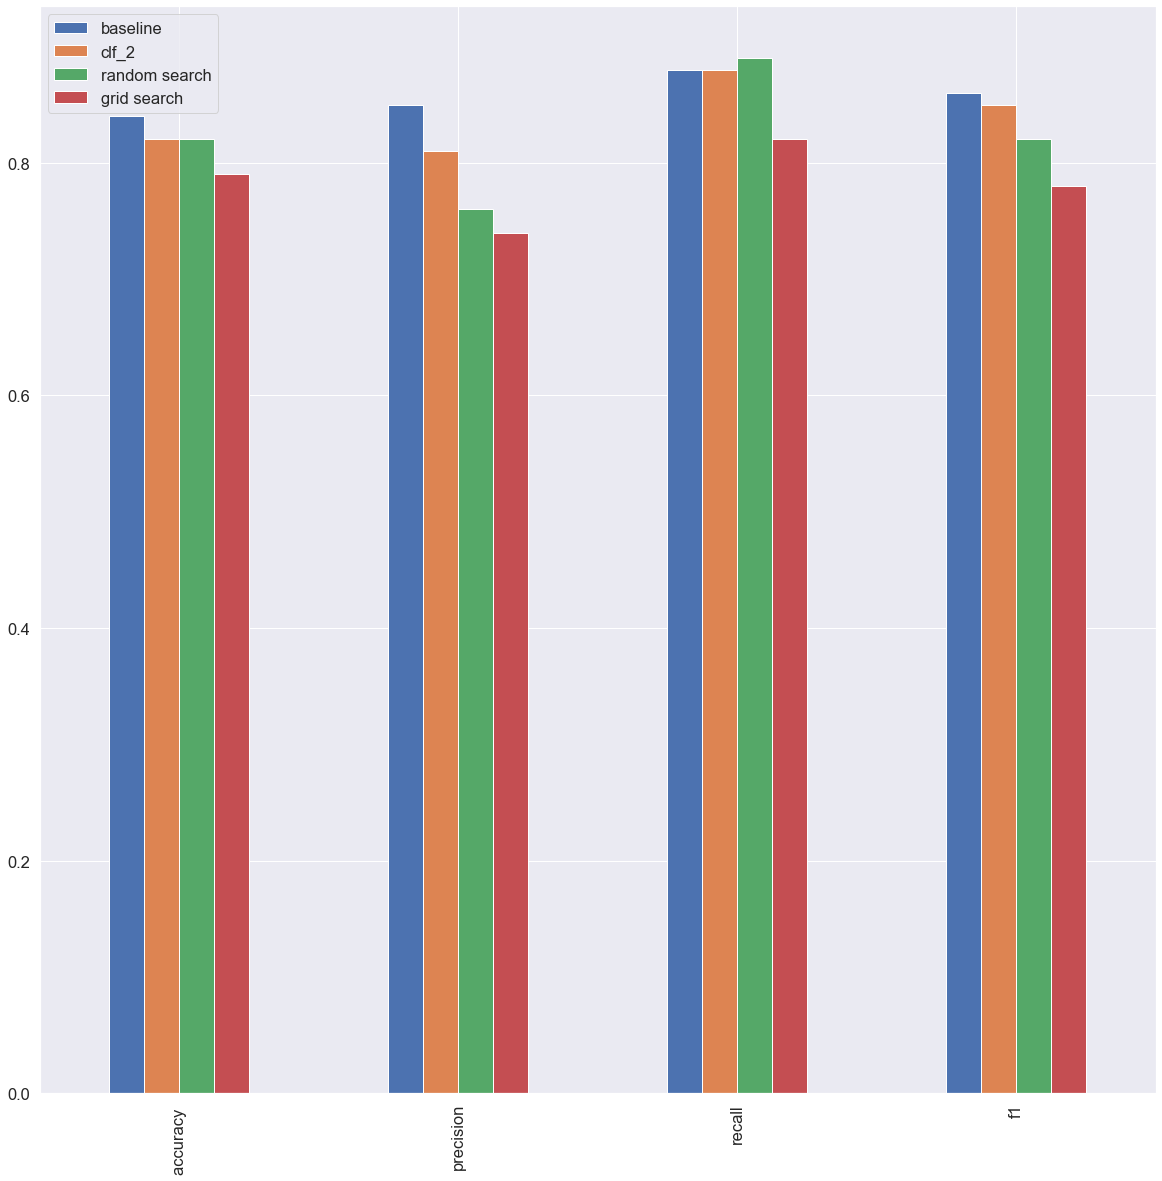

In [516]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "clf_2" : clf_2_metrics,
                                "random search" : rs_metrics,
                                "grid search" : gs_metrics})

compare_metrics.plot.bar(figsize = (20,20));
                     

## Comparing the metrics of different Scikit-Learn models

One of the most important things when comparing different models is to make sure they're compared on the same data splits.

For example, let's say you have model_1 and model_2 which each differ slightly.

If you want to compare and evaluate their results, model_1 and model_2 should both be trained on the same data (e.g. X_train and y_train) and their predictions should each be made on the same data, for example:

model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds
model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds
Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

This short notebook compares 3 different models on a small dataset.

A baseline RandomForestClassifier (all default parameters)
A RandomForestClassifier tuned with RandomizedSearchCV (and refit=True)
A RandomForestClassifier tuned with GridSearchCV (and refit=True)
The most important part is they all use the same data splits created using train_test_split() and np.random.seed(42).

In [552]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , f1_score, recall_score
from sklearn.model_selection import train_test_split

In [590]:
# Create X and y 

np.random.seed(42)
X1 = iris_df.drop("target", axis = 1)
y1 = iris_df["target"]

# Create training and split data 

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2)

# Create a function to calculate and display all the metrics

def Cal_scores(y1_true, y_preds):
    """
    This function calculates and prints the Accuracy score, prediction, recall and f1score
    """

    Acc_score = accuracy_score(y1_true, y_preds)
    precision = precision_score(y1_true, y1_preds, average = None )
    recall = recall_score(y1_true, y_preds, average = None)
    f1 =  f1_score(y1_true, y_preds, average = None)

    score_calc = {"Acc_score" : accuracy_score,
              "Precision" : precision_score,
              "recall" : recall_score,
              "f1" : f1_score }
    
    print("The Accuracy is :" , (Acc_score))
    print("The precision is :" )
    print("The recall score is :" ,recall)
    print("The f1 score is :" ,f1)

    return score_calc



### 1. Baseline model with default parameters

In [591]:
model1 = RandomForestClassifier()

# Fit the model 

model1.fit(X1_train, y1_train)

# Make predictions 

y1_preds = model1.predict(X1_test)


Cal_scores(y1_test, y1_preds)

The Accuracy is : 1.0
The precision is :
The recall score is : [1. 1. 1.]
The f1 score is : [1. 1. 1.]


{'Acc_score': <function sklearn.metrics._classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>,
 'Precision': <function sklearn.metrics._classification.precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 'recall': <function sklearn.metrics._classification.recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 'f1': <function sklearn.metrics._classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>}

In [602]:
precision = precision_score(y1_test, y1_preds, average = 'micro' )
precision

1.0

In [597]:
conf_matrix = confusion_matrix(y1_test, y1_preds)
conf_matrix


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [600]:
model1.predict_proba(X1_test)

array([[0.  , 1.  , 0.  ],
       [0.94, 0.06, 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.99, 0.01],
       [0.  , 0.83, 0.17],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.87, 0.13],
       [0.  , 1.  , 0.  ],
       [0.  , 0.03, 0.97],
       [1.  , 0.  , 0.  ],
       [0.91, 0.09, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.98, 0.02],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.09, 0.91],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.02, 0.98],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

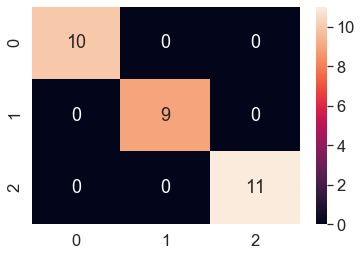

In [604]:
sns.heatmap(conf_matrix, annot = True)

In [609]:
grid = {"n_estimators" : [10,20,50,100],
       "max_depth" : [10,20]
       }

model_2 = RandomForestClassifier(n_jobs = 1)

rs_cv1 = RandomizedSearchCV(estimator = model_2,
                            param_distributions = grid,
                            n_iter=10,
                            scoring=None,
                            refit=True,
                            cv=5,
                            verbose=2,
                            random_state=42,
                            return_train_score=True)

rs_cv1.fit(X1_train, y1_train)
rs_cv1.predict(X1_test)

C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_estimators=10, max_depth=10 ...................................
[CV] .................... n_estimators=10, max_depth=10, total=   0.0s
[CV] n_estimators=10, max_depth=10 ...................................
[CV] .................... n_estimators=10, max_depth=10, total=   0.0s
[CV] n_estimators=10, max_depth=10 ...................................
[CV] .................... n_estimators=10, max_depth=10, total=   0.0s
[CV] n_estimators=10, max_depth=10 ...................................
[CV] .................... n_estimators=10, max_depth=10, total=   0.0s
[CV] n_estimators=10, max_depth=10 ...................................
[CV] .................... n_estimators=10, max_depth=10, total=   0.0s
[CV] n_estimators=20, max_depth=10 ...................................
[CV] .................... n_estimators=20, max_depth=10, total=   0.0s
[CV] n_estimators=20, max_depth=10 ...................................
[CV] ............

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.9s finished


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [613]:
rs_cv1.best_params_

{'n_estimators': 20, 'max_depth': 20}

## https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m#scrollTo=FtHx6gBvoh15

### 6. Saving and loading trained machine learning models 

Two ways to do it :

1. With python's pickle module
2. With the Joblib module

In [614]:
import pickle

# Save an existing model to file 

pickle.dump(gs_clf, open("gs_random_forest.pkl", "wb"))

In [615]:
# Load a saved model 

loaded_pickle_model = pickle.load(open("gs_random_forest.pkl", "rb"))


In [616]:
# Make some predictions 
pickle_y_preds = loaded_pickle_model.predict(X_test)
pickle_y_preds

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [617]:
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.68852459016394
Precision: 0.7419354838709677
Recall: 0.8214285714285714
f1 score: 0.7796610169491526


{'accuracy ': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**JobLib**

In [620]:
from joblib import dump, load

#Save model 
dump(gs_clf, "random_gs.joblib")


['random_gs.joblib']

In [622]:
# Import a saved joblib model 
loaded_job_model = load("random_gs.joblib")

In [625]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.68852459016394
Precision: 0.7419354838709677
Recall: 0.8214285714285714
f1 score: 0.7796610169491526


{'accuracy ': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [626]:
# if model is large, numpy arrays - Joblib is more efficient. 
# Otherwise pickle

## 7. Putting it all together

In [627]:
data = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [628]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [630]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell)

1. Fill missing data 
2. Convert data to numbers
3. Build the model on data 

In [672]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# s=Setup random seed
np.random.seed(42)

#Import data and drop rows with missing tables
data.dropna(subset= ["Price"], inplace = True)

# Define different features and transformer piepline 
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps= [
    ("imputer", SimpleImputer(strategy = "mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
transformers = [
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer , door_feature),
    ("num", numeric_transformer, numeric_features)
])

#Creating a preprocessing and modelling pipeline 
model = Pipeline(steps = [("preprocessor", preprocessor),
                         ("model", RandomForestRegressor())])



Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [681]:
# Split the data into X and y

X = data.drop("Price", axis = 1)
y = data["Price"]

# Split the data into training data and testing data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [665]:
#Fit and score the model

model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds

array([17230.93      , 20574.9       , 12178.37      ,  9447.74      ,
       11183.95      , 11231.67      , 15331.53      , 10190.57      ,
       16890.2       , 15543.12995349,  8507.68      , 14706.05      ,
        8540.46      , 10078.75      , 13621.74      , 19390.03      ,
       15321.42      ,  7333.25      , 11189.17      , 14673.69      ,
       11034.47      , 17870.78916667, 19788.46      , 27261.61      ,
        9844.61569444, 20839.74      , 12960.59      ,  7613.65      ,
       20620.06      , 17565.61      , 11275.18      , 17303.69      ,
       10461.54      , 10562.79702381, 27601.94      , 15958.32      ,
       12189.7       , 13732.5       , 21867.97      ,  9464.56      ,
       15225.12      , 20918.37      , 25181.11      , 15619.9       ,
       13951.85640476, 11739.25      , 14908.5       ,  8271.78      ,
       15343.38      , 13028.68      , 11248.02      , 21552.86      ,
       14754.9       ,  5757.34      , 12480.86      ,  9041.32      ,
      

In [682]:
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use GridSearchCV or RandomizedSearchCV with our pipeline

In [685]:
grid = {"preprocessor__num__imputer__strategy" : ["mean", "median"],
        "model__n_estimators" : [100,1000],
        "model__max_depth" : ["None", 5]
}
gsv = GridSearchCV(model,grid,
                    cv= 5,
                    verbose=2
                  )
                    

In [686]:
gsv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning:

[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances 

[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances 

[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 


C:\Users\Ankur\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  model__max_depth=None, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__n_estimators=100, preprocessor__num__imputer__stra

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   23.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [687]:
gsv.score(X_test, y_test)

0.33069916223036755

In [1]:
user = {
    'basket' : [1,2,3],
    'greet' : 'hello',
    'age' : 20
 }

In [2]:
user.get('basket')

[1, 2, 3]

In [5]:
user.keys() , user.values()

(dict_keys(['basket', 'greet', 'age']), dict_values([[1, 2, 3], 'hello', 20]))

In [7]:
print('age' in user.keys())

True


In [8]:
user.items()

dict_items([('basket', [1, 2, 3]), ('greet', 'hello'), ('age', 20)])

In [9]:
user.update({'age': 55})

In [10]:
print(user)

{'basket': [1, 2, 3], 'greet': 'hello', 'age': 55}


In [11]:
my_tuple = (1,2,3,4,5)
my_tuple[1]

2

In [20]:
my_tuple = (1, {'a' : 1}, 4)

In [27]:
my_tuple[1].values()

dict_values([1])

In [33]:
u = {
    (1,2) : [1,2,3],
    (2,2) : [2,2]
}

In [34]:
u[(1,2)]

[1, 2, 3]

In [35]:
u.items()

dict_items([((1, 2), [1, 2, 3]), ((2, 2), [2, 2])])

In [38]:
u[(2,2)]

[2, 2]

In [40]:
my_tuple.count(1)

1

In [41]:
my_tuple.index(1)

0

In [42]:
my_set = {1,2,3,4,5}
your_set = {4,5,6,7,8,9}

my_set.difference(your_set)

{1, 2, 3}

In [44]:
my_set.discard(5)
my_set

{1, 2, 3, 4}

In [47]:
my_set.difference_update(your_set)
print(my_set)

{1, 2, 3}


In [52]:
my_set = {1,2,3,4,5}
print(my_set.intersection(your_set))


{4, 5}


In [56]:
my_set.isdisjoint(your_set)

False

In [59]:
for i in [1,2,3,4]:
    print(i)

1
2
3
4


In [71]:
user = {
    'name' : 'akshita',
    'age' : 25,
    'can_swim' : False
}

for i,j in user.items():
    print(i,j)

name akshita
age 25
can_swim False


In [86]:
for i,char in enumerate(list(range(100))):
    if char == 50 :

        print("The index of 50 is", i)

The index of 50 is 50


In [88]:
def hello():
    print('hello')

hello()

hello


In [94]:
def mul(item):
    return item.upper()

print(list(map(mul, ['a','b','c'])))

['A', 'B', 'C']


In [97]:
def only_odd(item):
    return item % 2 !=  0
    
print(list(filter(only_odd, [1,2,3,4,5,6])))   

[1, 3, 5]


In [98]:
x= 2.8

type(x)

float

In [102]:
x= 'a'
x.upper()

'A'